Credit card fraud detection is the process of identifying purchase attempts that are fraudulent and rejecting them rather than processing the order. There are a variety of tools and techniques available for detecting fraud, with most merchants employing a combination of several of them.

When we talk about credit card fraud, we’re talking about situations where a payment card has been used to make a purchase without the knowledge or consent of the cardholder

## Importing the Datasets

In [150]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
# dataset "https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud"
credit_card_data = pd.read_csv('credit_card_data.csv')

In [3]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

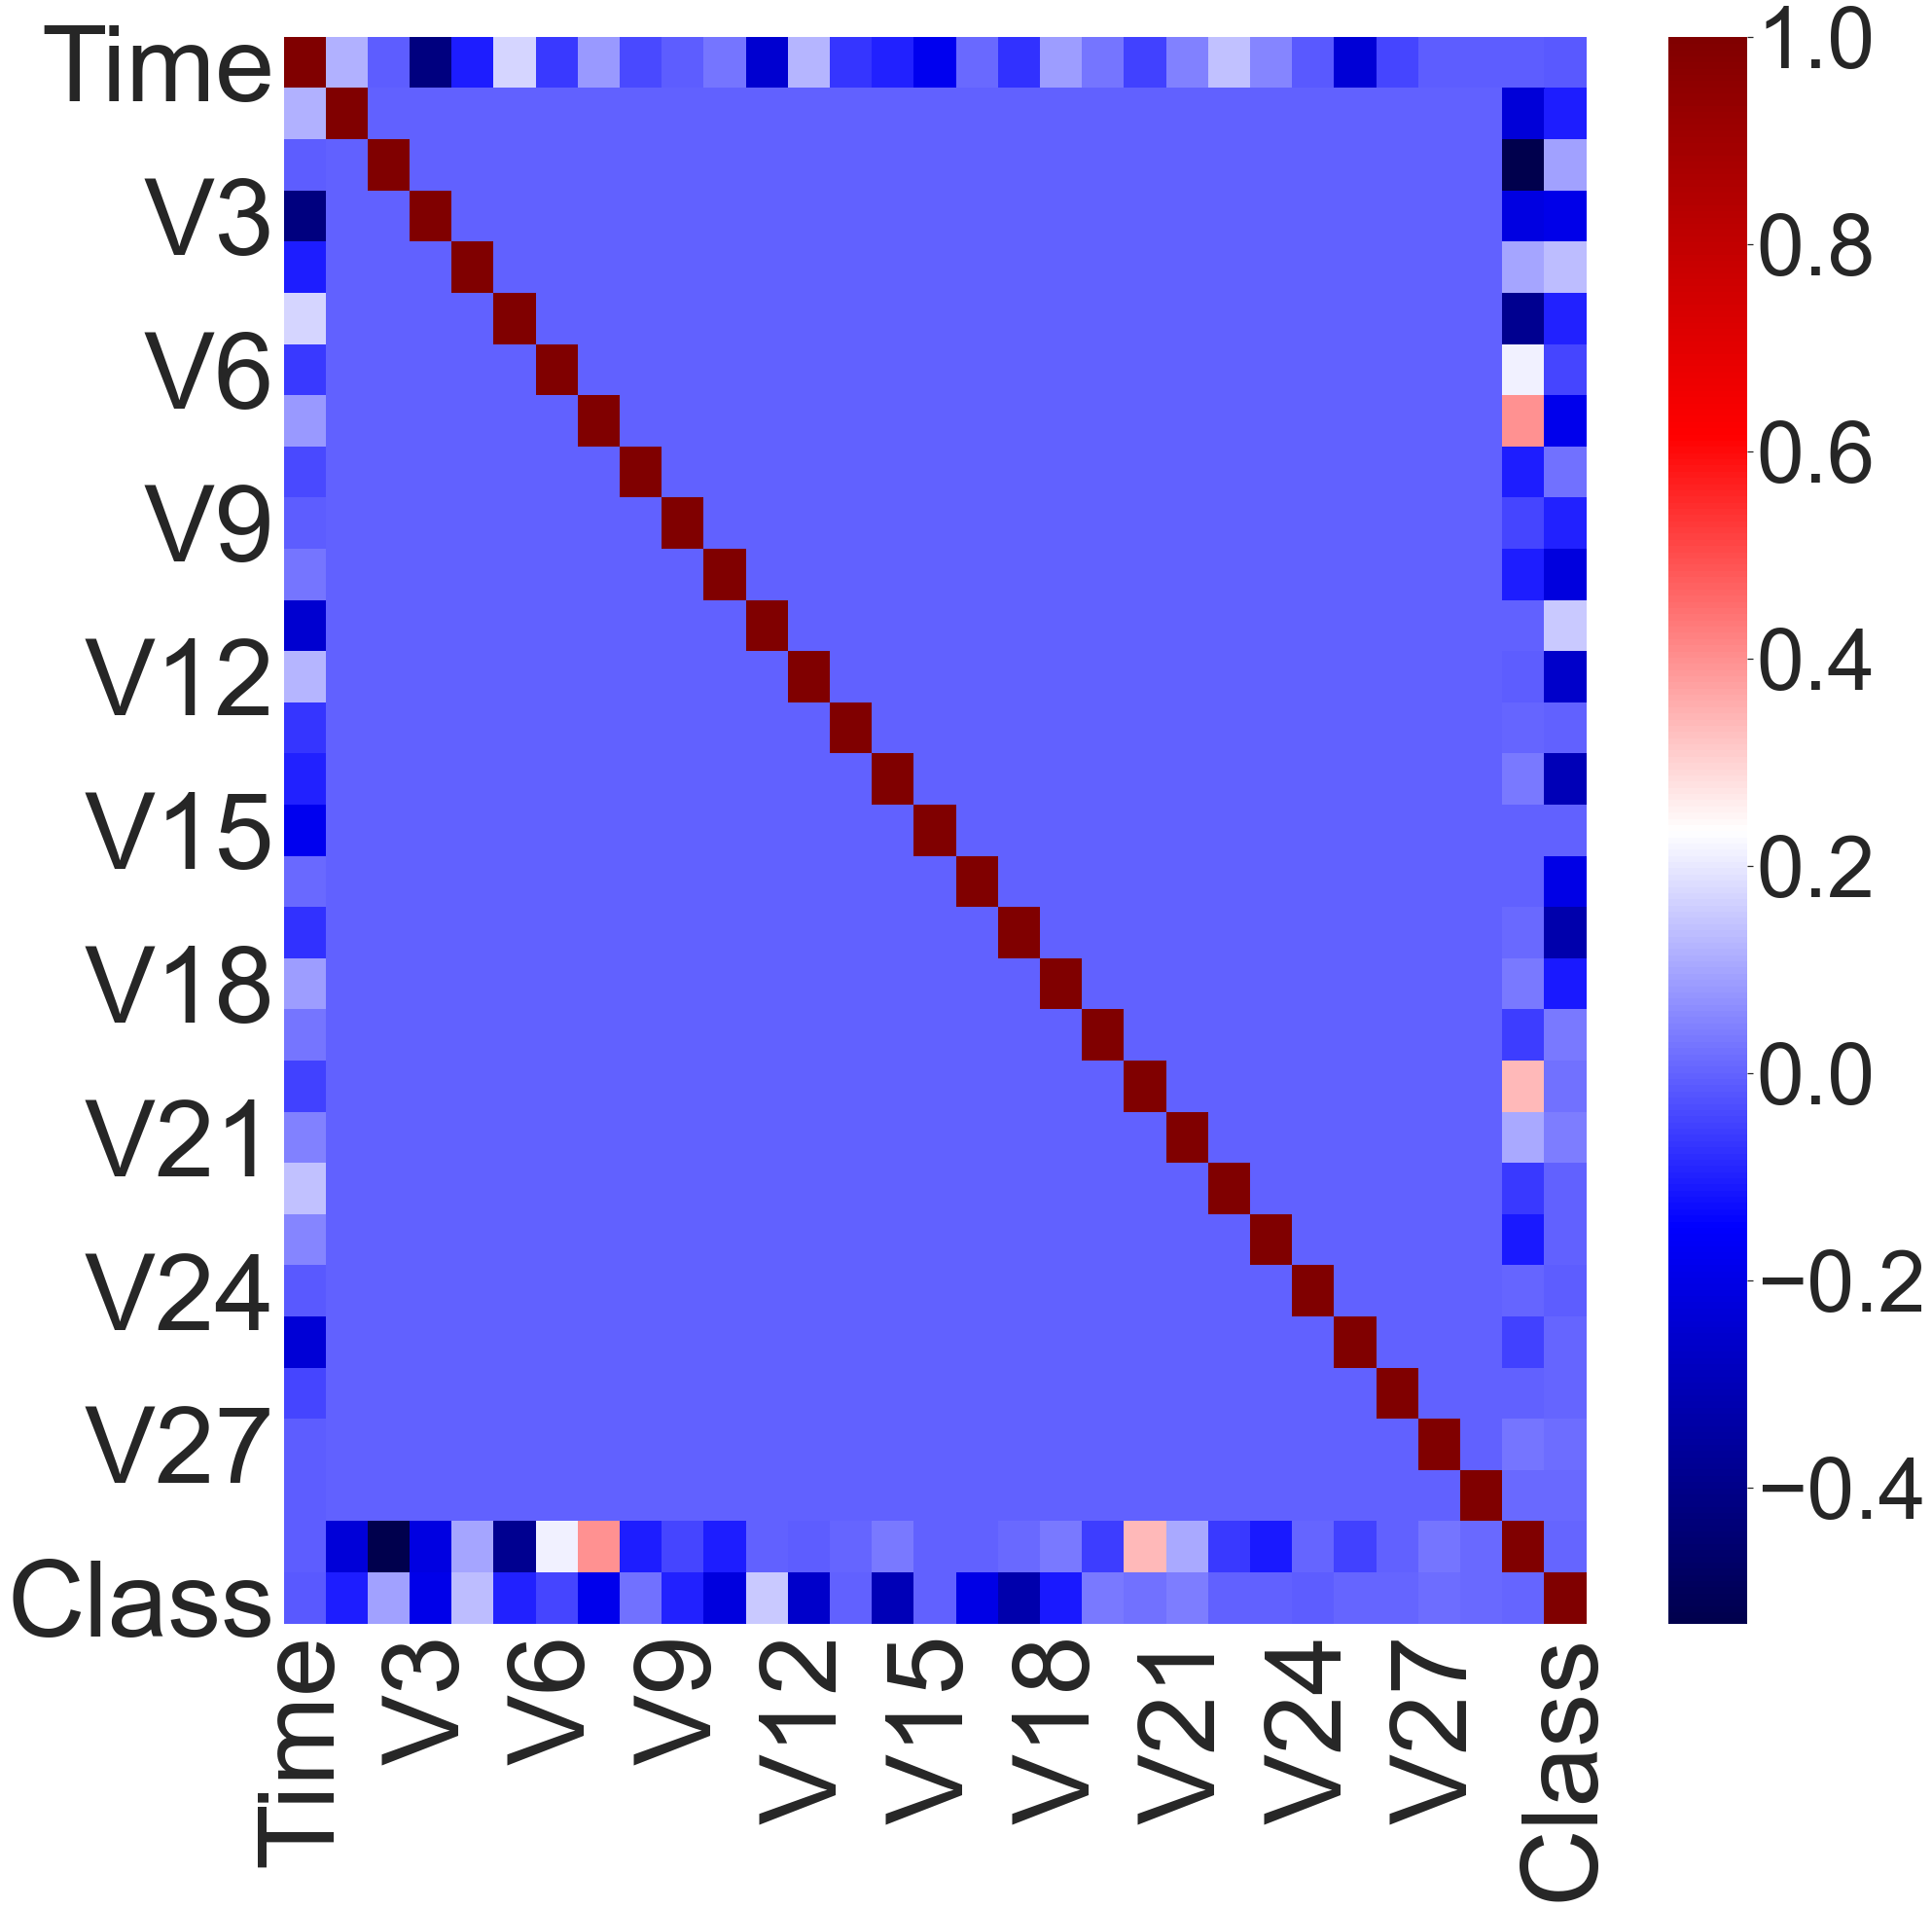

In [157]:
#heatmap to find any high correlations

fig, ax = plt.subplots(figsize=(30,30))
sns.set(font_scale=8)
sns.heatmap(data=credit_card_data.corr(), cmap="seismic", ax=ax, annot=False)
plt.show();

### Highest correlations come from:
Time & V3 (-0.42)

Amount & V2 (-0.53)

Amount & V4 (0.4)

In [7]:
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

The class of dataset are highly imbalanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [8]:

normal = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [9]:
print(normal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [12]:
# statistical measures of the data
normal['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

comapring both normal and fraud data

In [14]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Since our data is imbalanced we will do 
Under-Sampling

In [18]:
n = len(fraud)
normal_sample = normal.sample(n)

In [19]:
new_df = pd.concat([normal_sample, fraud], axis=0)

In [20]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
34895,37873.0,-0.680055,0.750116,1.496807,1.306257,-0.079109,1.813381,-0.445389,1.011181,0.208639,...,-0.283106,-0.492040,-0.098804,-1.152024,-0.243219,-0.379825,0.105009,0.070863,15.98,0
262724,160622.0,1.619832,-0.452306,-2.341006,0.834942,0.232688,-0.904866,0.392225,-0.153738,0.784143,...,-0.034422,-0.334179,-0.141882,-0.525890,0.082805,-0.310578,-0.032773,0.009119,203.43,0
222357,142942.0,2.273578,-1.194623,-1.636343,-1.692260,-0.637140,-0.915560,-0.522098,-0.384020,-1.803378,...,-0.291630,-0.529986,0.283748,0.567356,-0.160492,-0.341502,-0.029849,-0.044276,55.00,0
60969,49587.0,-0.792529,0.305942,1.375208,0.115700,0.199593,-0.229305,0.454949,0.115200,-0.109650,...,-0.096334,-0.191629,0.124411,-0.007413,-0.300712,0.180203,-0.004986,0.115353,28.99,0
56386,47400.0,1.578237,-1.204062,-1.149659,-2.502673,0.982799,3.234754,-1.489542,0.747173,-1.984723,...,-0.268109,-0.523666,0.000167,0.981689,0.549145,-0.191106,0.032900,0.014051,12.00,0


In [21]:
new_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [22]:
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [23]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,91555.052846,0.002081,-0.070992,0.120205,0.004146,-0.011671,0.034664,-0.103324,-0.124011,-0.090810,...,0.027971,-0.073003,0.010035,-0.026134,0.008923,0.014003,-0.016222,0.007664,0.002198,82.269146
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data 

In [24]:
X = new_df.drop(columns='Class', axis=1)
Y = new_df['Class']

In [25]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
34895    37873.0 -0.680055  0.750116  1.496807  1.306257 -0.079109  1.813381   
262724  160622.0  1.619832 -0.452306 -2.341006  0.834942  0.232688 -0.904866   
222357  142942.0  2.273578 -1.194623 -1.636343 -1.692260 -0.637140 -0.915560   
60969    49587.0 -0.792529  0.305942  1.375208  0.115700  0.199593 -0.229305   
56386    47400.0  1.578237 -1.204062 -1.149659 -2.502673  0.982799  3.234754   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [26]:
print(Y)

34895     0
262724    0
222357    0
60969     0
56386     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into Training data & Testing Data

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

Lets create a function to test our model

In [57]:
def performance(model):
    model.fit(X_train, Y_train)  
    train_pred = model.predict(X_train)
    acc_train = accuracy_score(train_pred, Y_train)
    print('Accuracy on Training data : ', acc)
    print()
    test_pred = model.predict(X_test)
    acc_test = accuracy_score(test_pred, Y_test)
    print('Accuracy score on Test Data : ', acc_test)
    print()
    print(classification_report(Y_test, test_pred))


In [61]:
log_model = LogisticRegression()

In [62]:
# training the Logistic Regression Model with Training Data
log_model.fit(X_train, Y_train)

C:\Users\Manju\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
performance(log_model)

Accuracy on Training data :  0.9364675984752223

Accuracy score on Test Data :  0.9441624365482234

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        99
           1       0.96      0.93      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



C:\Users\Manju\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
dt_model = DecisionTreeClassifier(
criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
  )
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [65]:
performance(dt_model)

Accuracy on Training data :  0.9364675984752223

Accuracy score on Test Data :  0.9289340101522843

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        99
           1       0.96      0.90      0.93        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf_model = RandomForestClassifier(
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    bootstrap=True,
    n_jobs=None
  )
rf_model.fit(X_train, Y_train)

RandomForestClassifier()

In [68]:
performance(rf_model)

Accuracy on Training data :  0.9364675984752223

Accuracy score on Test Data :  0.9289340101522843

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        99
           1       1.00      0.86      0.92        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



GridSearch cv

In [145]:
from sklearn.model_selection import GridSearchCV

In [146]:
para_ = {'n_estimators' : [50 ,100,150], 
          'criterion' : ['gini', 'entropy'],
          'max_depth' : [2,4],
          'max_features' : [5,10,15],
          'min_samples_split'  : [1,2,5],
         'bootstrap' : [True, False]}

In [147]:
estimator = RandomForestClassifier()

In [148]:
grid = GridSearchCV(estimator=estimator, param_grid=para_, refit = True, verbose=3)

In [151]:
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=2, max_features=5, min_samples_split=1, n_estimators=50; total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=2, max_features=5, min_samples_split=1, n_estimators=50; total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=2, max_features=5, min_samples_split=1, n_estimators=50; total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=2, max_features=5, min_samples_split=1, n_estimators=50; total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=2, max_features=5, min_samples_split=1, n_estimators=50; total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=2, max_features=5, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=2, max_features=5, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 3/5] END boot

[CV 3/5] END bootstrap=True, criterion=gini, max_depth=2, max_features=10, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=2, max_features=10, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=2, max_features=10, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=2, max_features=10, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=2, max_features=10, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=2, max_features=10, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=2, max_features=10, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=2, max_features=1

[CV 1/5] END bootstrap=True, criterion=gini, max_depth=2, max_features=15, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=2, max_features=15, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=2, max_features=15, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=2, max_features=15, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=2, max_features=15, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=2, max_features=15, min_samples_split=5, n_estimators=150; total time=   0.4s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=2, max_features=15, min_samples_split=5, n_estimators=150; total time=   0.4s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=2, max_feature

[CV 4/5] END bootstrap=True, criterion=gini, max_depth=4, max_features=10, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=4, max_features=10, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=4, max_features=10, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=4, max_features=10, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=4, max_features=10, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=4, max_features=10, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=4, max_features=10, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=4, max_feature

[CV 1/5] END bootstrap=True, criterion=gini, max_depth=4, max_features=15, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=4, max_features=15, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=4, max_features=15, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=4, max_features=15, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=4, max_features=15, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=4, max_features=15, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=4, max_features=15, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=4, max_features=

[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=2, max_features=5, min_samples_split=5, n_estimators=150; total time=   0.3s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=2, max_features=5, min_samples_split=5, n_estimators=150; total time=   0.4s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=2, max_features=5, min_samples_split=5, n_estimators=150; total time=   0.3s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=2, max_features=10, min_samples_split=1, n_estimators=50; total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=2, max_features=10, min_samples_split=1, n_estimators=50; total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=2, max_features=10, min_samples_split=1, n_estimators=50; total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=2, max_features=10, min_samples_split=1, n_estimators=50; total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_dep

[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=2, max_features=15, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=2, max_features=15, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=2, max_features=15, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=2, max_features=15, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=2, max_features=15, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=2, max_features=15, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=2, max_features=15, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV 2/5] END bootstrap=True, criterion=entropy, max_d

[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=4, max_features=5, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=4, max_features=5, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=4, max_features=5, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=4, max_features=5, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=4, max_features=5, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=4, max_features=5, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=4, max_features=5, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=4

[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=4, max_features=15, min_samples_split=1, n_estimators=50; total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=4, max_features=15, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=4, max_features=15, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=4, max_features=15, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=4, max_features=15, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=4, max_features=15, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=4, max_features=15, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, m

[CV 1/5] END bootstrap=False, criterion=gini, max_depth=2, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV 2/5] END bootstrap=False, criterion=gini, max_depth=2, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV 3/5] END bootstrap=False, criterion=gini, max_depth=2, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV 4/5] END bootstrap=False, criterion=gini, max_depth=2, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV 5/5] END bootstrap=False, criterion=gini, max_depth=2, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV 1/5] END bootstrap=False, criterion=gini, max_depth=2, max_features=5, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV 2/5] END bootstrap=False, criterion=gini, max_depth=2, max_features=5, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV 3/5] END bootstrap=False, criterion=gini, max_depth=2, max_featur

[CV 3/5] END bootstrap=False, criterion=gini, max_depth=2, max_features=10, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV 4/5] END bootstrap=False, criterion=gini, max_depth=2, max_features=10, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV 5/5] END bootstrap=False, criterion=gini, max_depth=2, max_features=10, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV 1/5] END bootstrap=False, criterion=gini, max_depth=2, max_features=10, min_samples_split=5, n_estimators=150; total time=   0.4s
[CV 2/5] END bootstrap=False, criterion=gini, max_depth=2, max_features=10, min_samples_split=5, n_estimators=150; total time=   0.4s
[CV 3/5] END bootstrap=False, criterion=gini, max_depth=2, max_features=10, min_samples_split=5, n_estimators=150; total time=   0.4s
[CV 4/5] END bootstrap=False, criterion=gini, max_depth=2, max_features=10, min_samples_split=5, n_estimators=150; total time=   0.4s
[CV 5/5] END bootstrap=False, criterion=gini, max_depth=2, max

[CV 5/5] END bootstrap=False, criterion=gini, max_depth=4, max_features=5, min_samples_split=1, n_estimators=100; total time=   0.1s
[CV 1/5] END bootstrap=False, criterion=gini, max_depth=4, max_features=5, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=gini, max_depth=4, max_features=5, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=gini, max_depth=4, max_features=5, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=gini, max_depth=4, max_features=5, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=gini, max_depth=4, max_features=5, min_samples_split=1, n_estimators=150; total time=   0.1s
[CV 1/5] END bootstrap=False, criterion=gini, max_depth=4, max_features=5, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV 2/5] END bootstrap=False, criterion=gini, max_depth=4, max_feature

[CV 2/5] END bootstrap=False, criterion=gini, max_depth=4, max_features=10, min_samples_split=2, n_estimators=150; total time=   1.2s
[CV 3/5] END bootstrap=False, criterion=gini, max_depth=4, max_features=10, min_samples_split=2, n_estimators=150; total time=   0.8s
[CV 4/5] END bootstrap=False, criterion=gini, max_depth=4, max_features=10, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV 5/5] END bootstrap=False, criterion=gini, max_depth=4, max_features=10, min_samples_split=2, n_estimators=150; total time=   1.0s
[CV 1/5] END bootstrap=False, criterion=gini, max_depth=4, max_features=10, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV 2/5] END bootstrap=False, criterion=gini, max_depth=4, max_features=10, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV 3/5] END bootstrap=False, criterion=gini, max_depth=4, max_features=10, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV 4/5] END bootstrap=False, criterion=gini, max_depth=4, max_fe

[CV 4/5] END bootstrap=False, criterion=gini, max_depth=4, max_features=15, min_samples_split=5, n_estimators=150; total time=   0.8s
[CV 5/5] END bootstrap=False, criterion=gini, max_depth=4, max_features=15, min_samples_split=5, n_estimators=150; total time=   0.8s
[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=2, max_features=5, min_samples_split=1, n_estimators=50; total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=2, max_features=5, min_samples_split=1, n_estimators=50; total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=2, max_features=5, min_samples_split=1, n_estimators=50; total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=2, max_features=5, min_samples_split=1, n_estimators=50; total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=2, max_features=5, min_samples_split=1, n_estimators=50; total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=entropy, max_dept

[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=2, max_features=10, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=2, max_features=10, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=2, max_features=10, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=2, max_features=10, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=2, max_features=10, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=2, max_features=10, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=2, max_features=10, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV 3/5] END bootstrap=False, criterion=entrop

[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=2, max_features=15, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=2, max_features=15, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=2, max_features=15, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=2, max_features=15, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=2, max_features=15, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=2, max_features=15, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=2, max_features=15, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV 3/5] END bootstrap=False, criterion=entrop

[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=4, max_features=10, min_samples_split=1, n_estimators=50; total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=4, max_features=10, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=4, max_features=10, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=4, max_features=10, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=4, max_features=10, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=4, max_features=10, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=4, max_features=10, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=en

[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=4, max_features=15, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=4, max_features=15, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=4, max_features=15, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=4, max_features=15, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=4, max_features=15, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=4, max_features=15, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=4, max_features=15, min_samples_split=2, n_estimators=150; total time=   1.2s
[CV 2/5] END bootstrap=False, criterion=en

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'], 'max_depth': [2, 4],
                         'max_features': [5, 10, 15],
                         'min_samples_split': [1, 2, 5],
                         'n_estimators': [50, 100, 150]},
             verbose=3)

In [75]:
grid.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 15,
 'min_samples_split': 2,
 'n_estimators': 50}

In [77]:
predict_grid = grid.predict(X_test)

In [79]:
print(accuracy_score(Y_test, predict_grid))

print(classification_report(Y_test, predict_grid))

0.9187817258883249
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        99
           1       1.00      0.84      0.91        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



# Thank You